In [2]:
import numpy as np
import random as random
import matplotlib.pyplot as plt

On va considérer ceci :


Let $NS$ denote the set of behaviors satisfying the no-signaling constraints (7). It is not difficult to see that $NS$ is an affine subspace of $\mathbb{R}^{\Delta^2 m^2}$ of dimension
\begin{equation}
\dim \mathcal{N}_S = 2(\Delta - 1)m + (\Delta - 1)^2 m^2 =: t,
\end{equation}
see e.g. \cite{Pironio2005}. One can thus parametrize points in $NS$ using $t$ numbers rather than the $\Delta^2 m^2$ numbers (or $(\Delta^2 - 1)m^2$ taking into account normalization) necessary to specify a point in the general probability space $P$. A possible parametrization is given by the set of probabilities:
\[
\{p(a|x), p(b|y), p(ab|xy)\},
\]
where $a, b = 1, \ldots, \Delta - 1$ and $x, y = 1, \ldots, m$.




On va donc coder les éléments $p$ sous forme de vecteurs de taille $t$ et comprenant dans l'ordre les $p(ab|xy)$ puis les $p(a|x)$ puis $p(b|x)$

On choisit une représentation sous forme de vecteur numpy. L'élément p(ab|xy) est donc codé par : $y+m*(x-1)+m^2*(b-1)+(\Delta-1)*m^2*(a-1)-1$ 
$p(a|x)$ est donc codé par $m^2 * (\Delta-1)^2 -1 + x + m*(a-1)$
et $p(b|y)$ par $m^2 * (\Delta -1)^2 + (\Delta - 1)* m - 1 + y + m*(b-1)$


In [3]:
def d_lamda(m,delta,lamda):
    d_l=np.zeros(m**2*(delta-1)**2 + 2*(delta-1)*m)
    for a in range(1,delta):
        for b in range(1,delta):
            for x in range(1,m+1):
                if a==lamda[x-1]:
                    for y in range(1,m+1):
                        if b==lamda[y+m-1]:
                            d_l[y+m*(x-1)+m**2*(b-1)+delta*m**2*(a-1)-1]=1
    for x in range(1,m+1):
        for a in range(1,delta):
            if int(lamda[x-1])==a:
                d_l[m**2 *(delta-1)**2  - 1 + x + m*(a-1)]=1
    for y in range(1,m+1):
        for b in range(1,delta):
        #on prend les b tq by = y
            if int(lamda[y+m-1])==b:
                d_l[m**2 *(delta-1)**2  + (delta-1)*m - 1 + y + m*(b-1)]=1
    return d_l

On définit de quoi créer des lambdas (pour le cas 2 entrées 2 sorties on pourrait tous les parcourir)

In [4]:
def liste_lamda(m,delta,n=1000):
    l_lamda=[]
    if m==2 and delta == 2 :
        return [np.array([0., 0., 0., 0., 0., 0., 0., 0.]), np.array([0., 0., 0., 0., 0., 0., 1., 1.]), np.array([0., 1., 0., 0., 1., 0., 0., 1.]), np.array([0., 0., 1., 1., 0., 1., 1., 1.]), np.array([0., 0., 0., 1., 0., 1., 0., 1.]), np.array([1., 1., 1., 1., 1., 1., 1., 1.]), np.array([0., 0., 0., 0., 1., 0., 0., 0.]), np.array([0., 0., 0., 0., 0., 1., 0., 0.]), np.array([0., 0., 0., 0., 0., 0., 0., 1.]), np.array([1., 0., 0., 0., 1., 0., 1., 0.]), np.array([1., 1., 0., 0., 1., 0., 1., 1.]), np.array([0., 0., 1., 0., 0., 1., 1., 0.]), np.array([0., 1., 0., 1., 1., 1., 0., 1.]), np.array([1., 0., 1., 0., 1., 1., 1., 0.]), np.array([0., 0., 0., 0., 1., 1., 0., 0.]), np.array([0., 0., 0., 0., 0., 0., 1., 0.])]
    for i in range(n):
        lamda=np.zeros(2*m)
        for j in range(1,m+1):
            aj=random.randint(1,delta)
            bj=random.randint(1,delta)
            lamda[j-1]=aj
            lamda[j-1+m]=bj
        l_lamda.append(lamda)
    return l_lamda

On définit une inégalité de Bell sous la forme $s \cdot p + c$. On crée des inégalités de Bell en créant des vecteurs $s$ de $R^t$ et des réels $c$

In [5]:
def borne_bell(bell,m,delta,n=1000): #donne la borne locale obtenue après n essais pour une inégalité de Bell s
    (s,c)=bell
    liste_lamdas=liste_lamda(m, delta,n)
    bmin,bmax=100000,-100000
    for lamda in liste_lamdas:
        d_lamda0=d_lamda(m, delta, lamda)
        bmin=min(bmin,np.dot(s,d_lamda0)+c)
        bmax=max(bmax,np.dot(s,d_lamda0)+c)
    #print(bmax)
    return bmin,bmax

In [6]:
from conversions import base_correlateur_2_base_proba
# Bell in the correlator form:
s = [1, 1, 1, -1, 0, 0, 0, 0]
(s_proba, constant) = base_correlateur_2_base_proba(s)
#s_proba = base_proba_2_base_correlateur(s)

print(s_proba)
#print(base_proba_2_base_correlateur(s_proba))
bmin, bmax = borne_bell((s_proba,constant), 2, 2)
print(bmin)
print(bmax)

[4, 4, 4, -4, -4, 0, -4, 0]
-2.0
2.0


In [7]:
def s_hasard(m,delta):
    t=(delta-1)**2 * m**2 + 2 * (delta-1)*m
    s=np.zeros(t)
    for a in range(1,delta):
        for b in range(1,delta):
            for x in range(1,m+1):
                    for y in range(1,m+1):
                        s[y+m*(x-1)+m**2*(b-1)+delta*m**2*(a-1)-1]=2*random.random()-1
    for a in range(1,delta):
        for x in range(1,m+1):
            s[m**2 *(delta-1)**2  - 1 + x + m*(a-1)]=2*random.random()-1
    for b in range(1,delta):
        for y in range(1,m+1):
            s[m**2 *(delta-1)**2  + (delta-1)*m - 1 + y + m*(b-1)]=2*random.random()-1
    c=0
    #print(s,c)
    return (s,c)

In [8]:
def s_CHSH():
    s=np.zeros(8)
    s[0]=0
    s[1]=0
    s[2]=0
    s[3]=0
    s[4]=1
    s[5]=1
    s[6]=1
    s[7]=-1
    return(s,-1)

In [9]:

print(borne_bell(s_CHSH(),2,2,1000))

(-2.0, 1.0)


On va maintenant projeter des inégalités de Bell dans un plan. On définira un plan comme une liberté sur 2 paramètres pour l'instant. Avec les valeurs des autres paramètres fixés. Les deux axes sont des vecteurs non liés + on a une origine . L'idée est de regarder les points p0 +alpha u +beta v pour u et v raisonnables.

In [10]:
def projection(bell,borne,vecteur_origine, vecteur_u,vecteur_v):
    s,c=bell

    
    abscisse=np.linspace(-0.1,1.1,100)
    
    c_origine=np.dot(s,vecteur_origine)
    c_u=np.dot(s,vecteur_u)
    c_v=np.dot(s,vecteur_v)
    
    if c_v!=c_origine :
        ordonnee=(borne-c_origine  - abscisse*c_u)/(c_v-c_origine) 
        return abscisse,ordonnee

    print("nul")
    

In [11]:
def plot_inégalités(n_inégalités,vecteur_origine, vecteur_u,vecteur_v,m,delta):
    for i in range(n_inégalités):
        s=s_hasard(m,delta)
        borne=borne_bell(s,m,delta,1000)[1]
        abscisse,ordonnee=projection(s,borne,vecteur_origine, vecteur_u,vecteur_v)
        plt.plot(abscisse,ordonnee)
    plt.scatter(1,0,150,'r','*')
    plt.scatter(0,1,150,'r','*')
    plt.ylim([-0.1,1.1])
    plt.show()
    
        

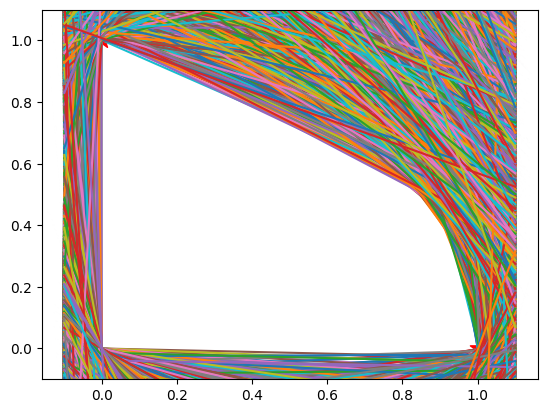

In [12]:
liste_d_lamda=[]
l_lamda=liste_lamda(2,2,1000)
for lamda in l_lamda : 
    a=d_lamda(2,2,lamda)
    in_=False 
    for j in liste_d_lamda :
        if np.array_equal(j,a) :
            in_=True
    if not in_ :
        liste_d_lamda.append(a)

#print(liste_d_lamda)
#print(len(liste_d_lamda))
#print(d_lamda(2,2,[2., 1., 1., 2.]))
#p=d_lamda(2,2,[2., 1., 1., 2.])

plot_inégalités(300000,liste_d_lamda[0],0.6*(liste_d_lamda[4]-liste_d_lamda[0])+0.4*(liste_d_lamda[7]-liste_d_lamda[0]),0.7*(liste_d_lamda[3]-liste_d_lamda[0])+0.3*(liste_d_lamda[8]-liste_d_lamda[0]),2,2)


In [13]:
s=np.array([ 0.391987 ,   0.17378041,  0.04503969,  0.71164992,  0.37399338, -0.328816,
  0.667455,    0.96382679])
t=0.8
np.dot(s,t*liste_d_lamda[1]+(1-t)*liste_d_lamda[3])

-0.07028744200000006